# Data Scientist Salary Prediction

### Credits to Ken Jee for Dataset and his work
[https://github.com/PlayingNumbers/ds_salary_proj](http://)

# In this we will predict the salary of data scientist, data analyst, machine learning engineer in cities of USA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('../input/glassdoor_jobs.csv')
print(data.shape)
data.head()

(956, 15)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [3]:
# Dropping Columns 
data = data.drop('Unnamed: 0', axis=1)

### Taking only the rows with salary and eliminating others

In [4]:
data = data[data['Salary Estimate'] != '-1']

### Dealing with Salary 

In [5]:
data['hourly_pay'] = data['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0 )
data['employer_prov'] = data['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0 )

In [6]:
salary = data['Salary Estimate'].apply(lambda x: x.split('(')[0])
k_dollar_rep = salary.apply(lambda x: x.replace('K', '').replace('$', ''))
salary_range = k_dollar_rep.apply(lambda x: x.replace('Per Hour', '').replace('Employer Provided Salary:',''))

#### Splitting into min and max salaries

In [7]:
data['min_sal'] = salary_range.apply(lambda x: int(x.split('-')[0]))
data['max_sal'] = salary_range.apply(lambda x: int(x.split('-')[1]))
data['avg_sal'] = (data.min_sal + data.max_sal)/2

## Extracting Company Name text

In [8]:
data['company'] = data.apply(lambda x: x['Company Name'] if x['Rating'] < 0 else x['Company Name'][:-4], axis = 1)
# data.company.head()

## Separating State from location
## Comparing the location of job state with headquarter's state

In [9]:
# data.Location.head()

In [10]:
data['cities'] = data['Location'].apply(lambda x: x.split(', ')[0])
data['job_states'] = data['Location'].apply(lambda x: x.split(', ')[1])
# data.states.value_counts() # We have one unique abbrevated state as Los Angeles
data['job_states'] = data['job_states'].apply(lambda x: 'LA' if x =='Los Angeles' else x)
# data.states.value_counts()

In [11]:
# data.Headquarters.head()

### If you want same state only use this

In [12]:
# data['headquartes_state'] = data['Headquarters'].apply(lambda x: x.split(', ')[-1])
# print(data.job_states.head())
# print(data['headquartes_state'].head())
# data['same_state'] = data.apply(lambda x: 1 if x.job_states == x.headquartes_state else 0, axis =1)
# data.same_state.head()

### If you want both city and state to be same use this

In [13]:
data['same_state'] = data.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis=1)

# Company's Age
We will decide its age using current year subtracted from founded year

In [14]:
data['age'] = data['Founded'].apply(lambda x: x if x<1 else 2020-x )

# Job Description Parsing
### Searching with the relevant skills like
#### Python, R, R studio, AWS, Spark, Excel
If you want more you can add

In [15]:
# print(data.columns)
# print(data.shape)

In [16]:
# yn is yes(1) or no(0) 
# Python
data['python_yn'] = data['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
# print('Python count:\n',data.python_yn.value_counts())

# R studio
data['Rstudio_yn'] = data['Job Description'].apply(lambda x: 1 if ('r studio' in x.lower() or 'r-studio' in x.lower()) else 0)
# print('R or R studio count:\n',data.Rstudio_yn.value_counts())

# Excel
data['excel_yn'] = data['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
# print('Excel count:\n',data.excel_yn.value_counts())

# AWS
data['aws_yn'] = data['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
# print('AWS count:\n',data.aws_yn.value_counts())

# Spark
data['spark_yn'] = data['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
# print('Spark count:\n',data.spark_yn.value_counts())

## Simple JOB titles and Seniority level

In [17]:
# dict(data['Job Title'].value_counts())

In [18]:
def title_simp(title):
    '''Makes the given below set of jobs as title other that these will be nil which can later changed'''
    
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle' #Machine Learning Engineer
    elif 'manager' in title.lower():
        return 'manager' 
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
    
def seniority(title):
    '''Considers only senior and junior if any other then returns NaN can be changed later'''
    
    seniors = ['senior', 'sr', 'lead', 'principal']
    
    for senior in seniors:
        if senior in title.lower():
            return 'sr'
    if 'jr' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

In [19]:
data['job_simp'] = data['Job Title'].apply(title_simp)
data['seniority_lvl'] = data['Job Title'].apply(seniority)

data.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [20]:
# data.seniority_lvl.value_counts()

### JOB description Length
Created new column of length of job description

In [21]:
data['job_des'] = data['Job Description'].apply(lambda x: len(x))
# data.job_des

### Competitors count

In [22]:
# data.Competitors.value_counts()

In [23]:
data['comp_num'] = data['Competitors'].apply(lambda x: 0 if x == 0 else len(x.split(',')))

In [24]:
data.comp_num.value_counts()

1    472
3    228
2     41
4      1
Name: comp_num, dtype: int64

### Hourly salary converting to Annual package
Assume that all data enthusiast work around 50 hours per week

In [25]:
data['min_sal'] = data.apply(lambda x: (x.min_sal*50*52)/1000 if x.hourly_pay == 1 else x.min_sal, axis=1)
data['max_sal'] = data.apply(lambda x: (x.max_sal*50*52)/1000 if x.hourly_pay == 1 else x.max_sal, axis=1)

In [26]:
data.to_csv('Salary_cleaned.csv', index=False)

## Storing into cleaned csv 
## Next is EDA

In [27]:
df = pd.read_csv('Salary_cleaned.csv')

In [28]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,Rstudio_yn,excel_yn,aws_yn,spark_yn,job_simp,seniority_lvl,job_des,comp_num
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,1,0,0,data scientist,na,2536,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,data scientist,na,4783,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,0,1,data scientist,na,3461,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,1,0,0,data scientist,na,2728,3


In [29]:
df.describe()

,Rating,Founded,hourly_pay,employer_prov,min_sal,max_sal,avg_sal,same_state,age,python_yn,Rstudio_yn,excel_yn,aws_yn,spark_yn,job_des,comp_num
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,75.110243,128.729380,100.626011,0.557951,46.591644,0.528302,0.002695,0.522911,0.237197,0.225067,3869.545822,1.673854
std,0.801210,497.183763,0.177034,0.149721,30.643742,44.496172,38.855948,0.496965,53.778815,0.499535,0.051882,0.499812,0.425651,0.417908,1521.495868,0.918451
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,1.000000
25%,3.300000,1939.000000,0.000000,0.000000,53.250000,96.250000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,1.000000
50%,3.700000,1988.000000,0.000000,0.000000,70.000000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3731.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


## Histograms

In [30]:
# Lets see the distribution of all and consider which for hist and to normalize
# df.hist()

Histogram of  Rating


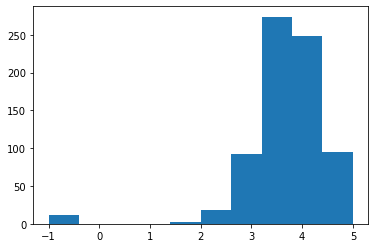

Histogram of  age


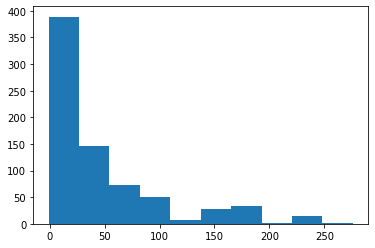

Histogram of  avg_sal


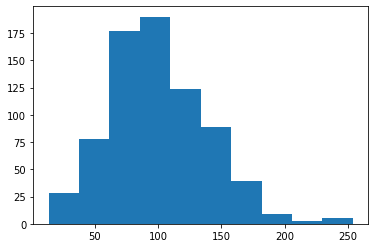

Histogram of  job_des


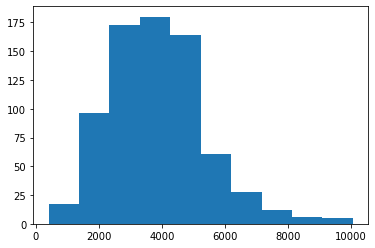

In [31]:
# Hist plot for visualizing distribution
hist_ls = ['Rating', 'age', 'avg_sal', 'job_des']
for feature in hist_ls:
    print('Histogram of ', feature)
    plt.hist(df[feature])
    plt.show()

### Analysis from Histograms
job_des, avg_sal, Rating, age - Normally distributed

age - Requires scaling or Normalization

## Box plots

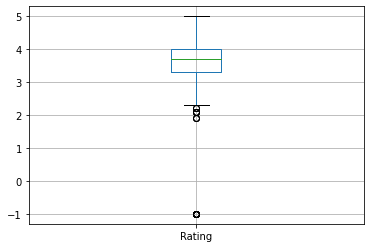

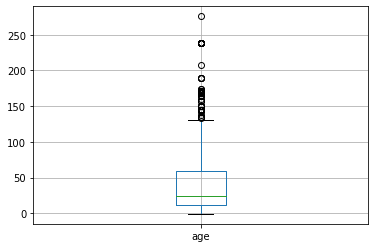

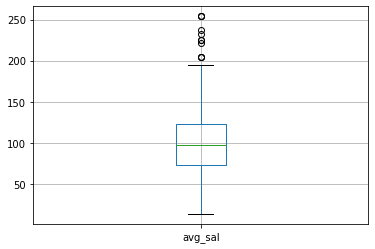

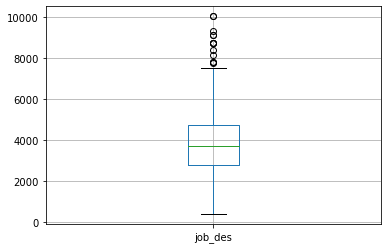

In [32]:
# cols = df.select_dtypes(include=np.number).columns.tolist() # use this visualize and take only the needed ones
cols = ['Rating', 'age', 'avg_sal', 'job_des']
for col in cols:
    df.boxplot(column= col)
    plt.show()

### Analysis of Box plot
Rating, age, avg_sal, job_des - all have outliers and to be go for scaling


# Correlation 

In [33]:
df[['Rating', 'age', 'avg_sal', 'job_des', 'comp_num']].corr()

,Rating,age,avg_sal,job_des,comp_num
Rating,1.000000,0.021655,0.013492,-0.012281,0.021395
age,0.021655,1.000000,0.019655,0.163911,0.137517
avg_sal,0.013492,0.019655,1.000000,0.078808,0.088790
job_des,-0.012281,0.163911,0.078808,1.000000,0.109321
comp_num,0.021395,0.137517,0.088790,0.109321,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

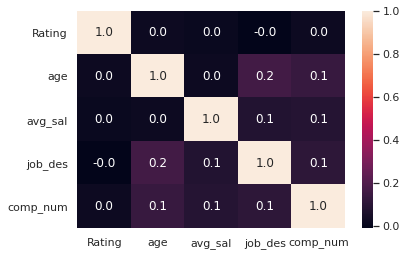

In [34]:
sns.set()
sns.heatmap(df[['Rating', 'age', 'avg_sal', 'job_des', 'comp_num']].corr(), annot=True, fmt='.1f')
plt.yticks(rotation = 0)

# Categorical Features 
## Visualization

In [35]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company', 'cities', 'job_states', 'same_state', 'python_yn',
       'Rstudio_yn', 'excel_yn', 'aws_yn', 'spark_yn', 'job_simp',
       'seniority_lvl']]

## Bar plots

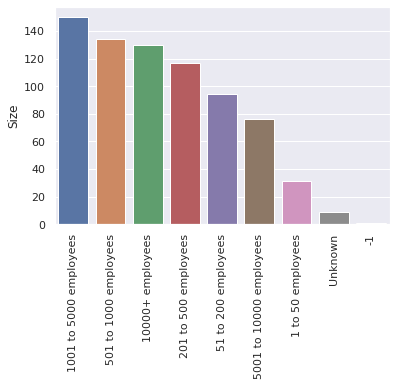

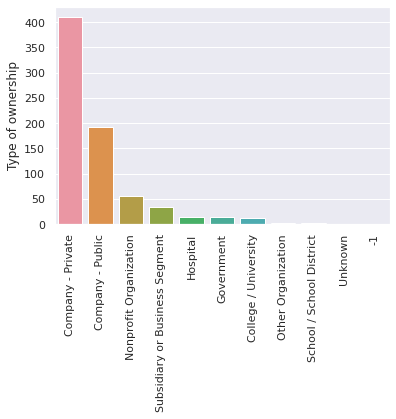

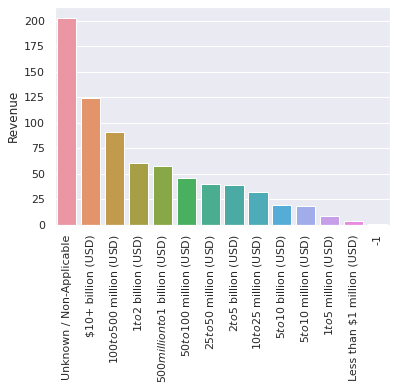

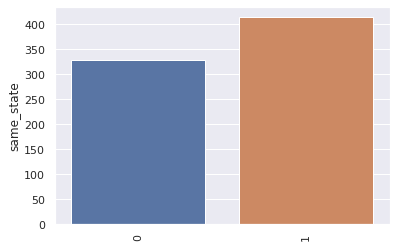

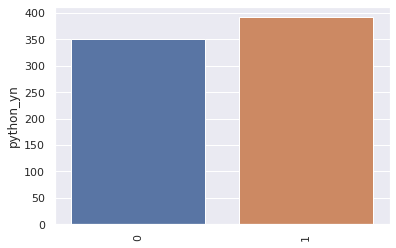

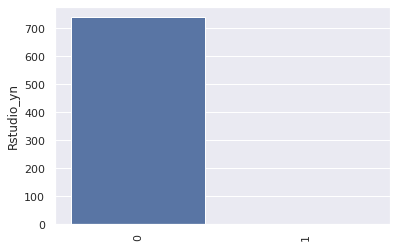

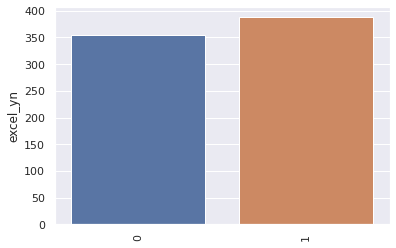

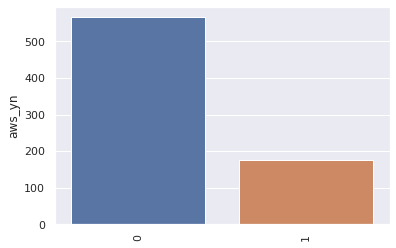

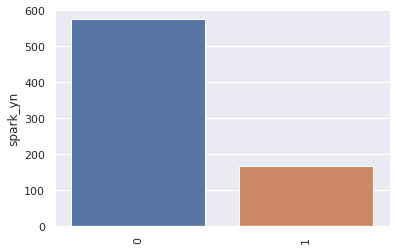

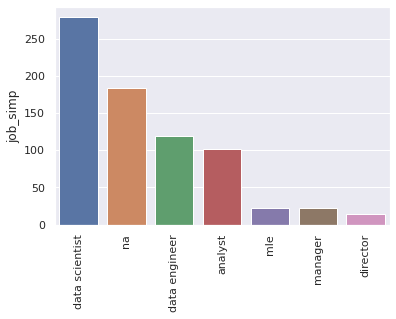

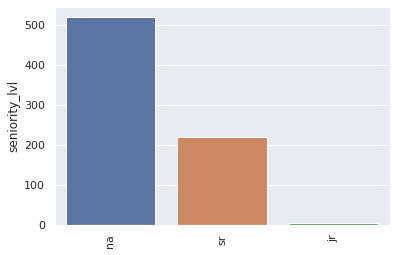

In [36]:
for feature in df_cat.columns:
    if len(df[feature].unique()) < 15:
        count = df[feature].value_counts()
    #     print('Plot for {} total : {}'.format(feature, len(count)))
        sns.barplot(x=count.index , y= count, data = df)
        plt.xticks(rotation=90)
        plt.show()

### Bar plots of first 15  for features with more unique values

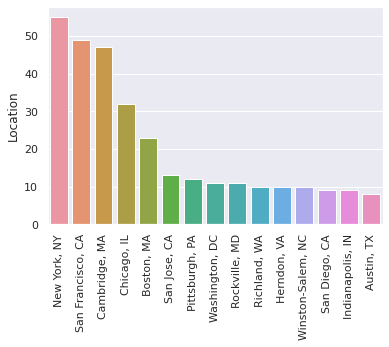

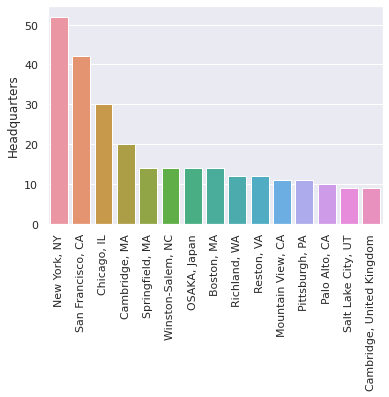

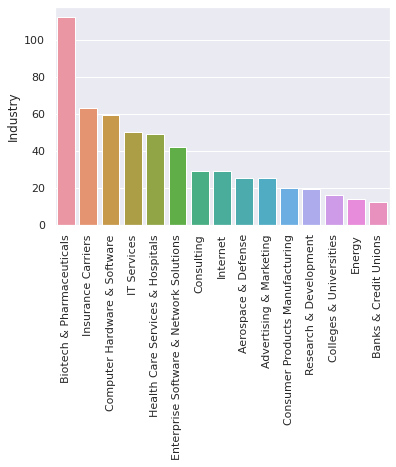

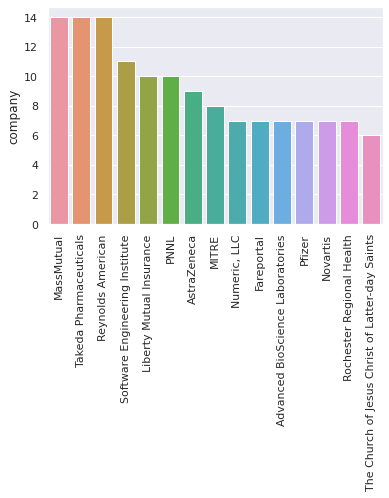

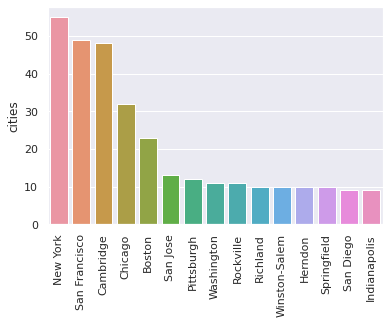

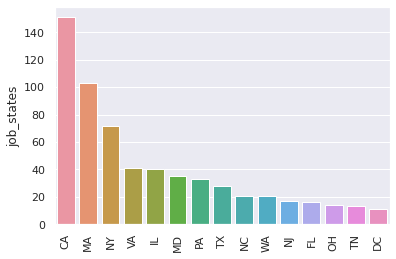

In [37]:
for feature in df_cat[['Location', 'Headquarters', 'Industry', 'company', 'cities', 'job_states']].columns:
    count = df[feature].value_counts()[:15] # We can just view the Top 15 in all Series
#     print('Plot for {} total : {}'.format(feature, len(count)))
    sns.barplot(x=count.index , y= count, data = df)
    plt.xticks(rotation=90)
    plt.show()  

## Pivot tables 


In [38]:
# Using pivot_table() function
pd.pivot_table(df, index='job_simp', values='avg_sal')

,avg_sal
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [39]:
# Avg salary based on job title and the seniority level
pd.pivot_table(df, index=['job_simp', 'seniority_lvl'], values='avg_sal')

avg_sal
job_simp       seniority_lvl            
analyst        jr              53.250000
               na              61.308219
               sr              79.092593
data engineer  na              96.701220
               sr             124.689189
data scientist jr             106.500000
               na             107.043011
               sr             138.956522
director       na             168.607143
manager        na              84.022727
mle            na             119.133333
               sr             142.071429
na             na              73.988189
               sr             109.061404

In [40]:
# Checking for data scientist avg salary per state
pd.pivot_table(df[df.job_simp == 'data scientist'], index='job_states', values='avg_sal').sort_values('avg_sal', ascending=False)

,avg_sal
job_states,
DC,149.000000
CA,143.044776
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


## Model Building

In [41]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,Rstudio_yn,excel_yn,aws_yn,spark_yn,job_simp,seniority_lvl,job_des,comp_num
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,1,0,0,data scientist,na,2536,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,data scientist,na,4783,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,0,1,data scientist,na,3461,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,1,0,0,data scientist,na,2728,3


In [42]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly_pay', 'employer_prov', 'min_sal', 'max_sal', 'avg_sal',
       'company', 'cities', 'job_states', 'same_state', 'age', 'python_yn',
       'Rstudio_yn', 'excel_yn', 'aws_yn', 'spark_yn', 'job_simp',
       'seniority_lvl', 'job_des', 'comp_num'],
      dtype='object')

# Considering only the required columns

In [43]:
train = df[['Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly_pay', 'employer_prov',
       'company', 'cities', 'job_states', 'same_state', 'age', 'python_yn',
       'Rstudio_yn', 'excel_yn', 'aws_yn', 'spark_yn', 'job_simp',
       'seniority_lvl', 'job_des', 'comp_num']]

# Making dummies using pandas 

In [44]:
X = pd.get_dummies(train)
X.shape

(742, 716)

In [45]:
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Columns: 716 entries, Rating to seniority_lvl_sr
dtypes: float64(1), int64(11), uint8(704)
memory usage: 579.8 KB


In [46]:
y = df['avg_sal']

In [47]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [48]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [49]:
model = RandomForestRegressor(n_estimators=140)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=140)

In [50]:
prediction = model.predict(X_test)

In [51]:
mean_absolute_error(y_test, prediction)

10.974904122722913

In [52]:
accuracy = model.score(X_test, y_test)
round(accuracy*100, 2)

80.23

# Tuning Parameters Using GridSearchCV

In [53]:
# parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

# gs = GridSearchCV(model,parameters,scoring='neg_mean_absolute_error',cv=3)
# gs.fit(X_train,y_train)

# gs.best_score_

In [54]:
# gs.best_estimator_

# Final prediction

In [55]:
model = RandomForestRegressor(n_estimators=140)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [56]:
accuracy = model.score(X_test, y_test)
round(accuracy*100, 2)

80.2